# Практическое задание

В данном задании предлагается реализовать алгоритм градиентного спуска для линейной функции вида $f(X) = kX + b$.

Задание состоит из 4-х частей.

1. Реализация линейной функции;

2. Реализация функции ошибки;

3. Реализация градиента от функции ошибки;

4. Реализация градиентного спуска.


При реализации запрещается пользоваться готовыми решениями. Можно использовать любые функции библиотек `numpy`.

Для корректной работы перед выполнение задания запустите ячейку ниже.

In [1]:
from regression_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy

X, y = get_data()               # Загружаем данные в X и y

Соблюдай PEP8. Это тоже будет оцениваться.

## 1. Реализация линейной функции

Для каждого элемента $X_i$ массива $X$ реализовать функцию $f(X_i) = kX_i + b$.

Входные параметры:

* Массив $X$: тип numpy.ndarray

* Значение коэффициента $k$: тип float

* Значение коэффициента $b$: тип float

Выходное значение:

* На выходе массив со значениями $f(X_i) = kX_i + b$:  numpy.ndarray


In [2]:
def f(X, k, b):
    return k * X + b

In [3]:
k = 10
b = -10

ans = np.array([-9. , -8.8, -8.7, -8.7, -8.6, -8.2, -7.9, -7.4, -7.4, -7.4,
                -7.2, -7.1, -7.1, -6.5, -6.5, -5.7, -5.4, -5.3, -5.2, -5.2])
assert np.allclose(f(X, k, b), ans), 'Неправильный ответ'
assert isinstance(f(X, k, b), np.ndarray), 'Тип возвращаемых данных должен быть numpy.ndarray'

## 2.  Реализация функции ошибки

Для входных данных массива $X$, реального выходного значения $y$ и параметров $k$ и $b$ необходимо реализовать функцию ошибки. 

Входные параметры:

* Массив $X$: тип numpy.ndarray

* Массив реальных выходных значений $y$: тип numpy.ndarray

* Значение коэффициента $k$: тип float

* Значение коэффициента $b$: тип float

Выходное значение:

* На выходе значение функции ошибки $Loss(k, b)$: тип float

Формула функции ошибки:

$Loss(k, b) = \dfrac{1}{N} \sum_{i=0}^{N}{((kX_i + b)- y_i)^2} $


In [4]:
def linear_loss_function(X, y, k, b):
    return np.mean((f(X, k, b) - y) ** 2)

In [5]:
k = 10
b = -10
eps = 1e-3

assert np.fabs(linear_loss_function(X, y, k, b) - 182.5425) < eps, 'Неправильный ответ'

## 3. Реализация градиента от функции ошибки

Для входных данных массива $X$, реального выходного значения $y$ и параметров $k$ и $b$ необходимо реализовать подсчет градиента функции ошибки. 

Входные параметры:

* Массив $X$: тип numpy.ndarray

* Массив реальных выходных значений $y$: тип numpy.ndarray

* Значение коэффициента $k$: тип float

* Значение коэффициента $b$: тип float

Выходное значение:

* На выходе массив значений градиента функции ошибки $\nabla Loss(k, b)$: тип numpy.ndarray.

Нулевой элемент выходного массива - это частная производная по $k$, первый элемент частная производная по $b$.

Формула градиента функции ошибки:


$\nabla Loss(k, b) = \left[\dfrac{\delta Loss(k, b)}{\delta k} ; \dfrac{\delta Loss(k, b)}{\delta b} \right]$

$\nabla Loss(k, b) = \left[\dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)X_i ; \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i) \right]$

In [6]:
def gradient_function(X, y, k, b):
    return (2 * np.mean((f(X, k, b) - y) * X), 2 * np.mean(f(X, k, b) - y))
    
k = 10
b = -10
grad = gradient_function(X, y, k, b)
print(grad)

(-7.826719999999999, -26.966)


In [7]:
k = 10
b = -10

ans = np.array([-7.826719999999999, -26.966])

assert np.allclose(gradient_function(X, y, k, b), ans), 'Неправильный ответ'

## 4. Реализация градиентного спуска

Для входных данных массива $X$, реального выходного значения $y$, начальных значений $k_{init}$ и $b_{init}$, значения параметра $\alpha$ необходимо реализовать градиентный спуск. 

На входе:

* Массив $X$: тип numpy.ndarray

* Массив реальных выходных значений $y$: тип numpy.ndarray

* Начальный коэффициент функции $k_{init}$: тип float

* Начальный коэффициент функции $b_{init}$: тип float

* Коэффициент обучения $\alpha$: тип float

* Количество итераций алгоритма $iter$: тип int

Выходное значение:

* На выходе кортеж со значениями коэффициентов $k$ и $b$ после градиентного спуска.

Алгоритм градиентного спуска: 

* Выбираем начальное значение для $k$ и $b$
* Повторяем $iter$ раз:

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b_{new} = b  - \alpha \cdot \dfrac{\delta J(k, b)}{\delta b} $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{\delta J(k, b)}{\delta k} $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b = b_{new}$, 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $k = k_{new}$
   
**Важно!** Сперва должны быть посчитаны частные производные для каждого параметра и только после этого их можно обновлять

In [8]:
def gradient_descent(X, y, k_init, b_init, alpha, iters):
    k = k_init
    b = b_init
    
    for i in range(0, iters):
        grad = gradient_function(X, y, k, b)
        k = k - alpha * grad[0]
        b = b - alpha * grad[1]
    
    return (k, b)

In [9]:
k_init = 5
b_init = -1
alpha = 0.75
iters = 500

k_gd, b_gd = gradient_descent(X, y, k_init, b_init, alpha, iters)
print(f"Значения коэффициентов k={k_gd} и b={b_gd}")
print(f"Ошибка на полученных коэффициентах: {linear_loss_function(X, y, k_gd, b_gd)}")

assert np.allclose(np.round(k_gd, 2), 15.69), 'Неправильный ответ'
assert np.allclose(np.round(b_gd, 2), 1.87), 'Неправильный ответ'

Значения коэффициентов k=15.692664739822165 и b=1.8691300755000857
Ошибка на полученных коэффициентах: 0.23360851725355353


In [10]:
np.round(k_gd, 2)

15.69

## 5. Насладимся результатом

В следующей ячейке можно посмотреть на полученный результат после завершения градиентного спуска.

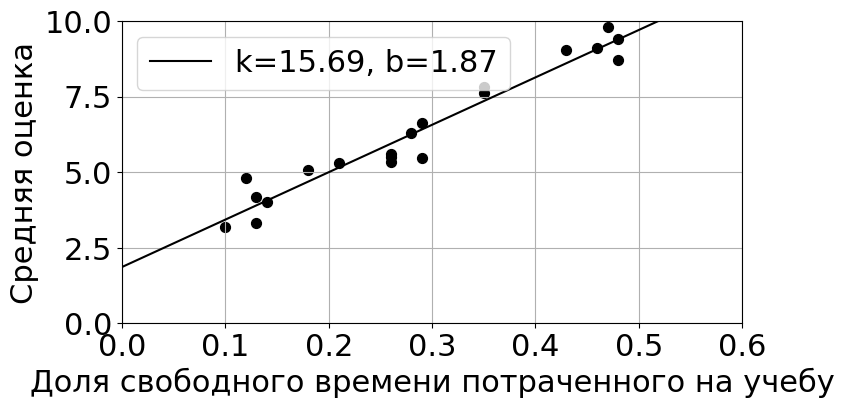

In [11]:
plot_data_and_hyp_with_bias(X, y, k_gd, b_gd)